\begin{equation}
f(x)=\frac{1}{\sqrt{2 \pi \sigma x}} e^{-\frac{(x-\mu)^{2}}{2 \sigma^{2}}}
\end{equation}

$$
f(x)=\frac{1}{\sqrt{2 \pi \sigma x}} e^{-\frac{(x-\mu)^{2}}{2 \sigma^{2}}}
$$

In [198]:
import numpy as np
import pandas as pd
import scipy.stats as sc
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pdf(x, mean, sd) = (1 / (sqrt(2 * PI) * sd)) * exp(-((x-mean^2)/(2*sd^2)))


In [161]:
raw_data = pd.read_csv("data.csv")
raw_data  # 569 * 33

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


In [162]:
columns_names = raw_data.columns.tolist()
columns_names

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

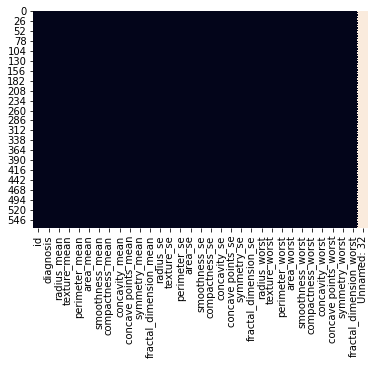

In [163]:
# Data cleaning
sns.heatmap(raw_data.isnull() , cbar=False)
#Droping last column
raw_data.drop(columns_names[-1],axis=1,inplace=True)
columns_names = columns_names[:-1]

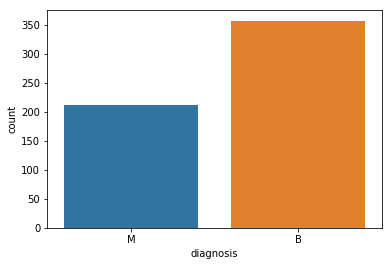

In [164]:
sns.countplot(raw_data['diagnosis'])

### This plot clearly shows that we dont have same amount of data for both the classes 
### to easy calculation we have to get same prior probabilties so they are cancel out in formula
### now we take 70% data of Malignant and Benign

# Data Preparation 

In [165]:
i = int((raw_data[raw_data['diagnosis'] == 'M']).shape[0] * .75)
training_data_malignant = raw_data[raw_data['diagnosis'] == 'M'].iloc[ : i,:]
testing_data_malignant = raw_data[raw_data['diagnosis'] == 'M'].iloc[i : ,:]

training_data_benign = raw_data[raw_data['diagnosis'] == 'B'].iloc[ : i,:]
testing_data_benign = raw_data[raw_data['diagnosis'] == 'B'].iloc[i :i + testing_data_malignant.shape[0] ,:]




In [166]:
training_data_benign.drop(columns_names[:2],inplace=True,axis=1)
training_data_malignant.drop(columns_names[:2],inplace=True,axis=1)

In [167]:
columns_names = columns_names[2:]
columns_names

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [168]:
training_data_malignant

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.4000,0.16250,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.52490,0.5355,0.17410,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.25760,0.3784,0.19320,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.36820,0.2678,0.15560,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.54010,0.5390,0.20600,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.05800,1.1050,0.22100,0.4366,0.20750


In [169]:
prior_probability_benign_tumor = len(training_data_benign) / (len(training_data_benign)+len(training_data_malignant))

prior_probability_malignant_tumor = len(training_data_malignant) /( len(training_data_benign)+len(training_data_malignant))


In [170]:
prior_probability_benign_tumor

0.5

In [171]:
prior_probability_malignant_tumor

0.5

In [172]:
training_data_malignant_mean_vector = np.array(training_data_malignant.mean())
training_data_malignant_mean_vector  # mean of all 30 features

array([1.71230818e+01, 2.13910063e+01, 1.13026792e+02, 9.39661635e+02,
       1.03086226e-01, 1.44196792e-01, 1.54917170e-01, 8.51771069e-02,
       1.94420126e-01, 6.29029560e-02, 5.93649686e-01, 1.20154717e+00,
       4.21379874e+00, 6.89690566e+01, 6.77821384e-03, 3.23263333e-02,
       4.07639623e-02, 1.46958679e-02, 2.10160314e-02, 4.07535849e-03,
       2.07947799e+01, 2.92136478e+01, 1.38807862e+02, 1.37485660e+03,
       1.45559057e-01, 3.75973270e-01, 4.39914969e-01, 1.79001824e-01,
       3.30622013e-01, 9.23906289e-02])

In [173]:
training_data_benign_mean_vector = np.array(training_data_benign.mean())
training_data_benign_mean_vector

array([1.20201006e+01, 1.73601258e+01, 7.72332704e+01, 4.53136478e+02,
       9.32145912e-02, 7.89505031e-02, 4.86592704e-02, 2.62109748e-02,
       1.76070440e-01, 6.28736478e-02, 2.93138365e-01, 1.22806792e+00,
       2.01220314e+00, 2.15888302e+01, 7.33208805e-03, 2.22175409e-02,
       2.85054277e-02, 1.03502642e-02, 2.15819434e-02, 3.85751761e-03,
       1.32064969e+01, 2.27507547e+01, 8.56394969e+01, 5.44349686e+02,
       1.25113648e-01, 1.76196038e-01, 1.66499031e-01, 7.35070503e-02,
       2.71333962e-01, 7.88374843e-02])

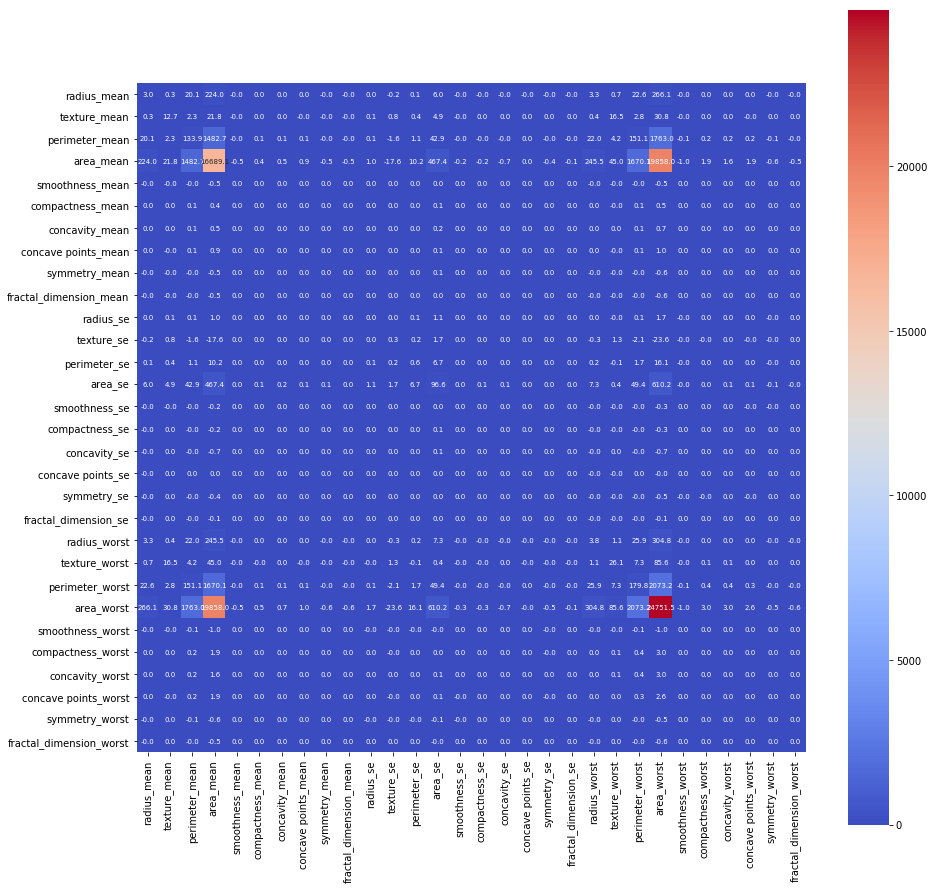

In [226]:
training_data_benign_cov_mat = training_data_benign.cov()
training_data_benign_cov_mat
plt.figure(figsize=(15,15))
sns.heatmap(training_data_benign_cov_mat, cbar = True,  square = True, annot=True, fmt= '.1f',annot_kws={'size': 7},
           xticklabels= columns_names, yticklabels= columns_names, cmap= 'coolwarm')
plt.show()

### area_mean and area_worst disturbing our data i.e they show high variences may be due to outliers 
### Actually How we know which feature is disturbing and which is not ?? Damn!! the range of this data is from 0 to 25000 and their is only all blue colors so it doesn't provide a good information.
### That's why we need to normalize our data.

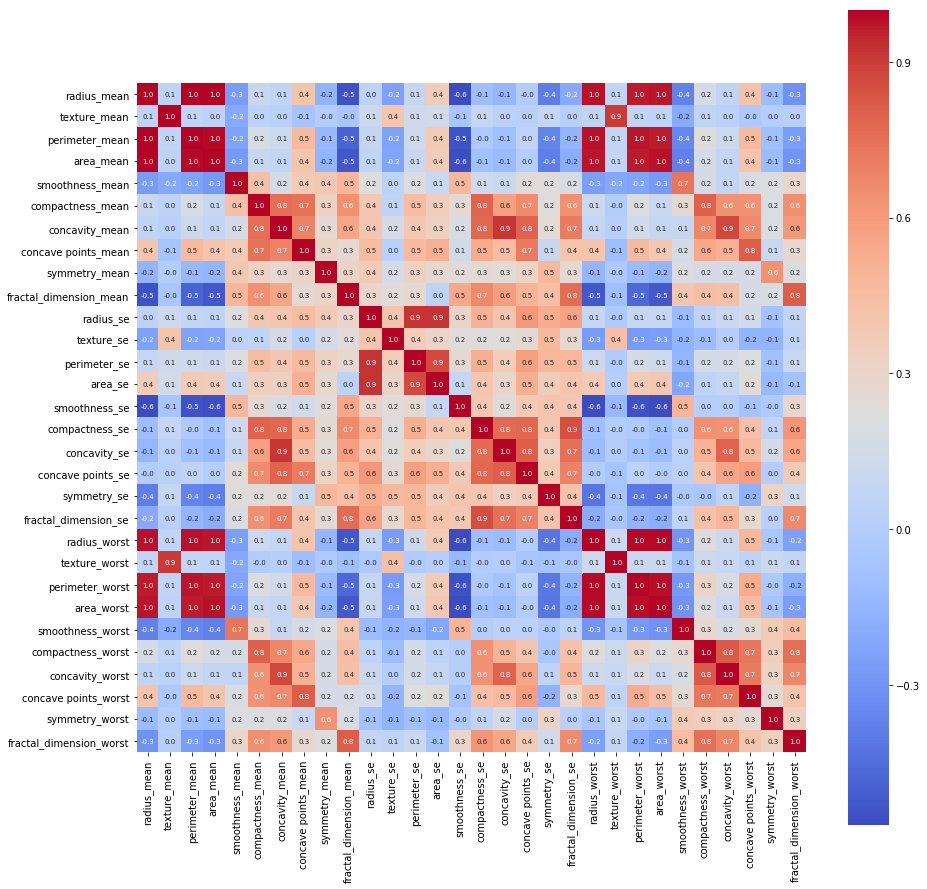

In [188]:
training_data_benign_corr_mat = training_data_benign.corr()
plt.figure(figsize=[15,15])
sns.heatmap(training_data_benign_corr_mat ,cmap='coolwarm' , annot_kws={'size': 7},
            cbar = True,  square = True, annot=True, fmt= '.1f')
plt.show()

### Red colors shows that they have positive highly correlated i.e. FULLY DEPENDENT FEATURES

# Note: corelation matrix doesn't change if we normalize our data or not
# but covarience matrix is change if we normalize our data

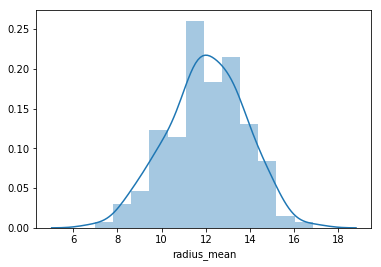

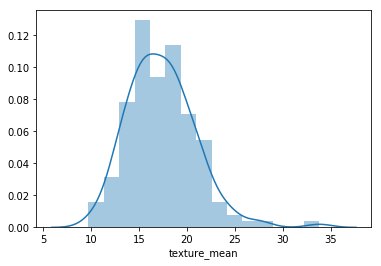

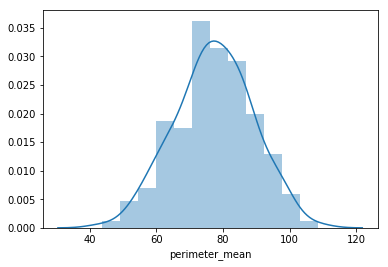

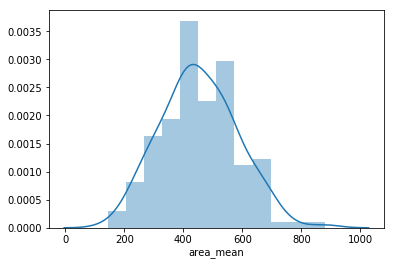

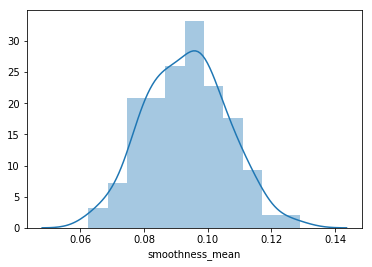

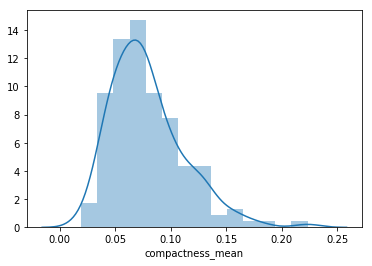

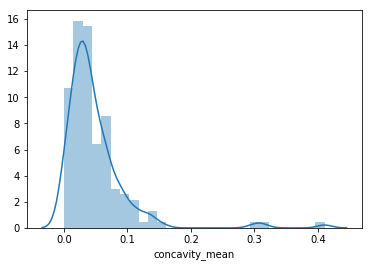

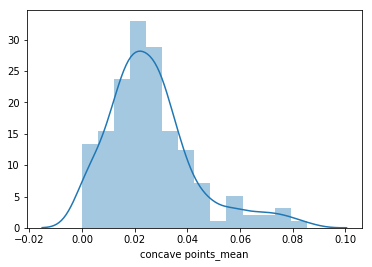

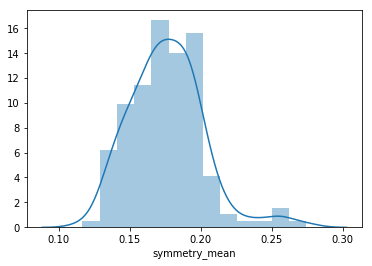

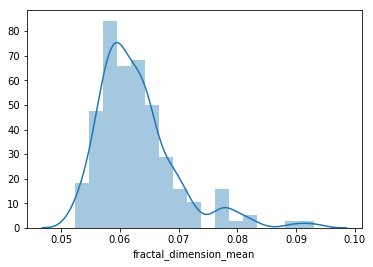

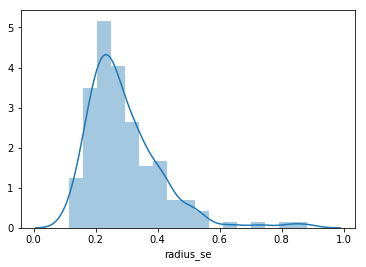

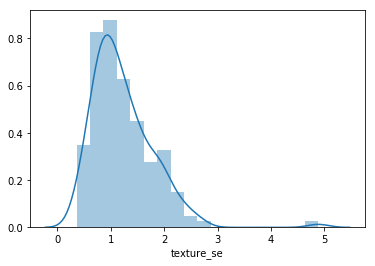

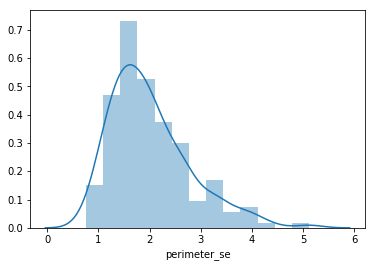

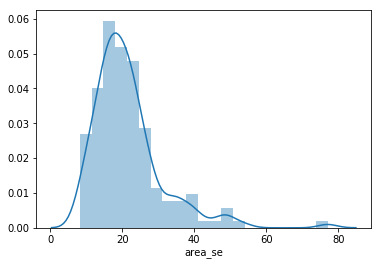

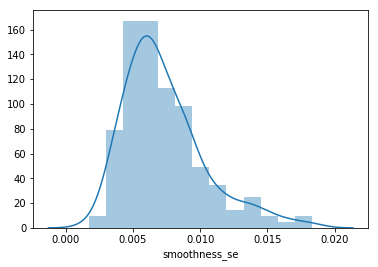

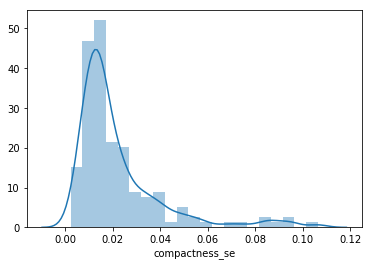

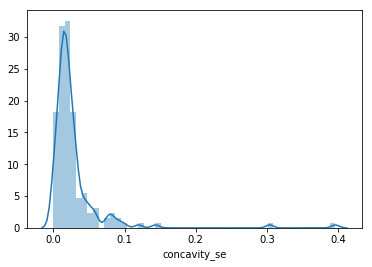

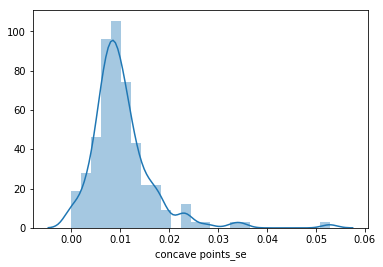

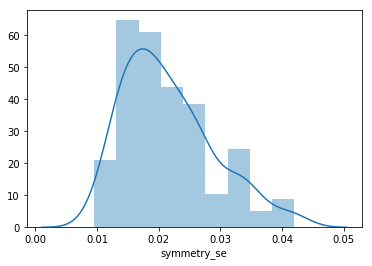

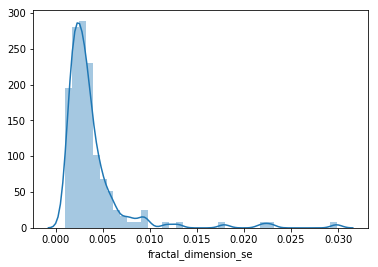

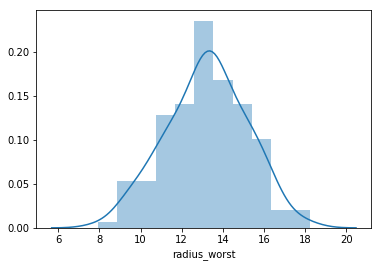

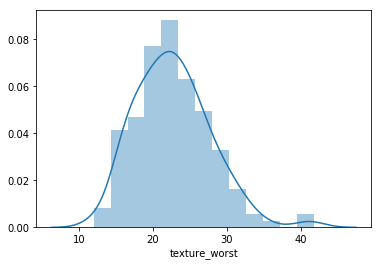

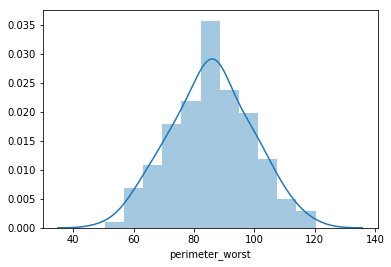

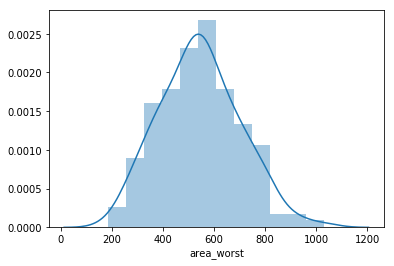

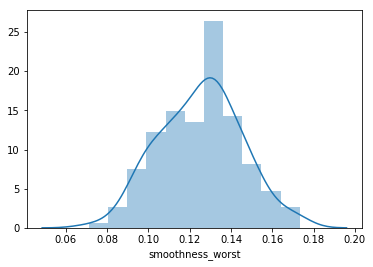

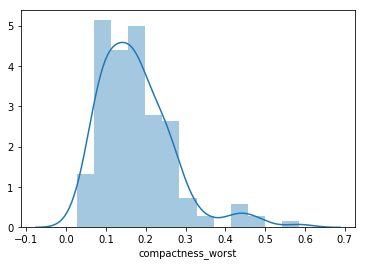

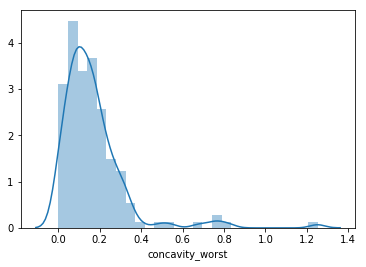

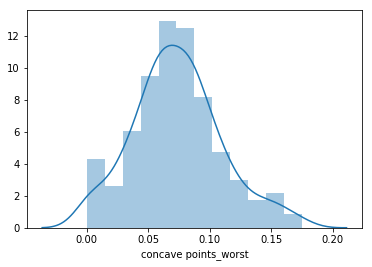

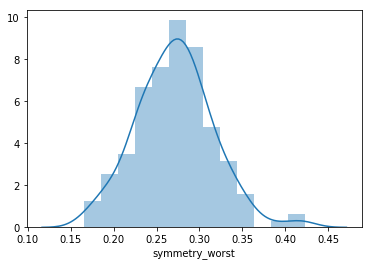

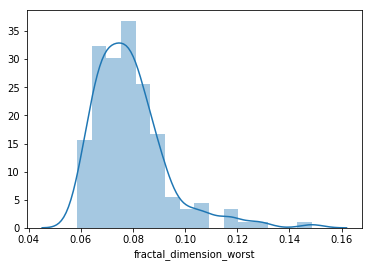

In [201]:
for feature in training_data_benign:
    sns.distplot(training_data_benign[feature])
    plt.show()

In [237]:
training_data_benign_normalized = (map(lambda i: training_data_benign[i] / max(training_data_benign[i]) , columns_names))
training_data_benign_normalized = pd.DataFrame(list(training_data_benign_normalized)).T

training_data_malignant_normalized = (map(lambda i: training_data_malignant[i] / max(training_data_malignant[i]) , columns_names))
training_data_malignant_normalized = pd.DataFrame(list(training_data_malignant_normalized)).T
training_data_malignant_normalized

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.639986,0.264257,0.651459,0.400560,0.818245,0.803706,0.703140,0.731113,0.795724,0.807779,...,0.766304,0.349818,0.836051,0.588287,0.728661,0.629112,0.644253,0.912027,0.693130,0.573012
1,0.731768,0.452393,0.705040,0.530612,0.585625,0.227678,0.203608,0.348757,0.596053,0.581589,...,0.754529,0.472547,0.719203,0.569930,0.556155,0.176371,0.218643,0.639175,0.414281,0.429012
2,0.700462,0.540988,0.689655,0.481393,0.757429,0.462942,0.462512,0.635686,0.680592,0.615661,...,0.711655,0.515341,0.690670,0.497960,0.648697,0.401229,0.407602,0.835052,0.544290,0.422072
3,0.406261,0.518839,0.411565,0.154502,0.984796,0.821946,0.565604,0.522863,0.854276,1.000000,...,0.450181,0.534921,0.447781,0.165414,0.942498,0.818809,0.621629,0.884880,1.000000,0.833735
4,0.721807,0.365071,0.716711,0.519008,0.693158,0.384482,0.463918,0.518390,0.595066,0.603756,...,0.680556,0.336496,0.689312,0.458916,0.617251,0.193762,0.361991,0.558419,0.356131,0.370024
5,0.442903,0.399695,0.438037,0.190916,0.883207,0.492183,0.369728,0.402038,0.686513,0.781301,...,0.467089,0.479411,0.468297,0.216084,0.804582,0.496125,0.484615,0.598282,0.600331,0.599518
6,0.649235,0.508656,0.634483,0.416166,0.653974,0.315576,0.264058,0.367793,0.590132,0.589286,...,0.690821,0.558337,0.693841,0.467949,0.647799,0.243478,0.342443,0.663918,0.461434,0.403277
7,0.487727,0.530295,0.478515,0.231253,0.821700,0.476259,0.219447,0.297465,0.722368,0.764676,...,0.515097,0.568026,0.500906,0.261364,0.743037,0.348015,0.242353,0.534708,0.481470,0.554699
8,0.462469,0.555499,0.464191,0.208003,0.879751,0.559351,0.435567,0.464861,0.773026,0.758313,...,0.467693,0.620307,0.480978,0.215414,0.765049,0.510491,0.487783,0.707904,0.659536,0.516627
9,0.443259,0.612016,0.445464,0.190436,0.819627,0.693688,0.532568,0.424602,0.667763,0.845956,...,0.455616,0.821155,0.442255,0.207284,0.832435,1.000000,1.000000,0.759450,0.657728,1.000000


In [660]:
u  , h , v= ((np.linalg.svd(training_data_benign_normalized,full_matrices=False)))
#pd.DataFrame(v)



# pdf(x, mean, sd) = (1 / (sqrt(2 * PI) * sd)) * exp(-((x-mean^2)/(2*sd^2)))

In [721]:
from sklearn.preprocessing import StandardScaler

original_data_2_B = training_data_benign.copy()
scaler = StandardScaler().fit(original_data_2_B) # it calculate mean and standard deviation

#data_scaled = pd.DataFrame(preprocessing.scale(df),columns = df.columns)
#scaler = StandardScaler().fit(features.values)
#features = scaler.transform(features.values)
#scaled_features = pd.DataFrame(features, columns = col_names)

normalize_data_2_B = scaler.fit_transform(original_data_2_B )
normalize_data_2_B = pd.DataFrame(normalize_data_2_B,columns = training_data_benign.columns)

from sklearn.decomposition import PCA
pca = PCA(n_components = 30  )
pca.fit(normalize_data_2_B)
reduced_data_2D_2_B = pca.transform(normalize_data_2_B)
reduced_data_2D_2_B = pd.DataFrame(reduced_data_2D_2_B , columns=normalize_data_2.columns)

#plt.figure(figsize=[20,20])
#sns.heatmap(reduced_data_2D_2.cov() ,cmap='coolwarm' , annot_kws={'size': 8},cbar = True,  square = True, annot=True, fmt= '.4f')
#plt.show()

#pd.DataFrame(pca.singular_values_)

det = np.linalg.det(reduced_data_2D_2_B.cov())
print ('Determinant of Covariance Matrix: %.25f'%det)



Determinant of Covariance Matrix: 0.0000000000000000000000000


In [674]:
pd.DataFrame((pca.components_)).T
import pandas as pd
import pylab as pl
from sklearn import datasets
from sklearn.decomposition import PCA

# load dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# normalize data
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(df),columns = df.columns) 

# PCA
pca = PCA(n_components=2)
pca.fit_transform(data_scaled)

# Dump components relations with features:
print pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2'])

      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
PC-1           0.522372         -0.263355           0.581254          0.565611
PC-2          -0.372318         -0.925556          -0.021095         -0.065416

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.055774,-0.345910,0.012588,-0.038932,-0.023331,-0.007519,0.027440,0.140167,0.070123,0.126007,0.110066,0.026477,0.039231,-0.053730
1,0.013104,-0.030323,0.162167,0.488145,-0.303906,-0.208796,0.021819,-0.136343,0.257534,0.029598,-0.133198,0.302167,-0.027745,-0.211193
2,-0.032670,-0.349283,0.005611,-0.039080,-0.021904,-0.015935,0.048379,0.155682,0.090326,0.097492,0.096621,0.035038,0.048689,-0.050823
3,-0.051355,-0.345683,0.017944,-0.036588,-0.012570,0.002162,0.045779,0.129922,0.054938,0.148366,0.134314,0.006187,0.062612,-0.065011
4,0.135931,0.096774,-0.083905,-0.349294,-0.286981,-0.314075,-0.045939,0.247727,-0.179266,0.089605,-0.120455,0.437459,0.201184,0.144315
5,0.279735,-0.084009,-0.095500,-0.031045,-0.034674,-0.129561,0.210778,0.241709,0.205265,-0.199261,-0.172637,0.150563,0.145124,0.131392
6,0.288578,-0.083646,-0.069656,0.099674,0.128372,0.097672,-0.219210,0.010534,-0.098913,0.104883,0.025303,0.127624,0.181945,-0.277492
7,0.222032,-0.187440,-0.026056,-0.179410,-0.061263,-0.131789,-0.254309,0.183540,0.169353,-0.077280,-0.139379,-0.046832,-0.307971,-0.250376
8,0.149661,0.042628,0.052168,-0.156317,-0.423592,0.381070,-0.022638,0.074342,0.141858,0.258646,-0.449375,-0.343680,0.262449,-0.083509
9,0.255470,0.161706,-0.070877,0.010065,0.057253,-0.071946,0.285750,0.204680,-0.061950,0.184409,-0.062917,0.083139,-0.158720,-0.339244


In [653]:
# Malignent
from sklearn.preprocessing import StandardScaler

original_data_2_M = training_data_malignant.copy()
scaler = StandardScaler()
scaler.fit(original_data_2_M) # it calculate mean and standard deviation

normalize_data_2_M = scaler.fit_transform(original_data_2_M)
normalize_data_2_M = pd.DataFrame(normalize_data_2_M)
normalize_data_2_M.columns = columns_names

from sklearn.decomposition import PCA
pca = PCA(n_components = 14)
pca.fit(normalize_data_2_M)
reduced_data_2D_2_M = pca.transform(normalize_data_2_M)
reduced_data_2D_2_M = pd.DataFrame(reduced_data_2D_2_M)

#plt.figure(figsize=[20,20])
#sns.heatmap(reduced_data_2D_2.cov() ,cmap='coolwarm' , annot_kws={'size': 8},cbar = True,  square = True, annot=True, fmt= '.4f')
#plt.show()

pd.DataFrame(pca.singular_values_)

det = np.linalg.det(reduced_data_2D_2_M.cov())
print ('Determinant of Covariance Matrix: %.25f'%det)

Determinant of Covariance Matrix: 0.2252241877555141158495644


In [640]:
training_data_benign_mean_vector = reduced_data_2D_2_B.mean()
training_data_benign_cov_mat = reduced_data_2D_2_B.cov()

training_data_benign_mean_vector = reduced_data_2D_2_B.mean()
training_data_malignant_mean_vector = reduced_data_2D_2_M.mean()
training_data_malignant_cov_mat = reduced_data_2D_2_M.corr()

#training_data_benign_cov_mat = training_data_benign_normalized.cov()
#training_data_benign_corr_mat = training_data_benign_normalized.corr()

#training_data_malignant_cov_mat = training_data_malignant_normalized.cov()
#training_data_malignant_corr_mat = training_data_malignant_normalized.corr()

#training_data_benign_mean_vector = training_data_benign_normalized.mean()
#training_data_malignant_mean_vector = training_data_malignant_normalized.mean()


In [647]:
correct_count = 0

for i in range(len(testing_data_malignant)):
    
    tumor_features = np.array(testing_M.iloc[i])
    
    likelihood_prob_malignant = sc.multivariate_normal.pdf(tumor_features,training_data_malignant_mean_vector,
                                                           training_data_malignant_cov_mat
                                                          ,allow_singular=True)
    
    likelihood_prob_benign = sc.multivariate_normal.pdf(tumor_features,training_data_benign_mean_vector,
                                                        training_data_benign_cov_mat
                                                       ,allow_singular = True)
    
    posterior_prob_malignant = likelihood_prob_malignant/(likelihood_prob_malignant + likelihood_prob_benign)
    
    if posterior_prob_malignant > 0.5:
        
        correct_count += 1
        
    print("The correct counts are",correct_count , " ",i)
    print(posterior_prob_malignant)



The correct counts are 0   0
nan
The correct counts are 0   1
nan
The correct counts are 0   2
nan
The correct counts are 0   3
nan
The correct counts are 0   4
nan
The correct counts are 0   5
nan
The correct counts are 0   6
nan
The correct counts are 0   7
nan
The correct counts are 0   8
nan
The correct counts are 0   9
nan
The correct counts are 0   10
nan
The correct counts are 0   11
nan
The correct counts are 0   12
nan
The correct counts are 0   13
nan
The correct counts are 0   14
nan
The correct counts are 0   15
nan
The correct counts are 0   16
nan
The correct counts are 0   17
nan
The correct counts are 0   18
nan
The correct counts are 0   19
nan
The correct counts are 0   20
nan
The correct counts are 0   21
nan
The correct counts are 0   22
nan
The correct counts are 0   23
nan
The correct counts are 0   24
nan
The correct counts are 0   25
nan
The correct counts are 0   26
nan
The correct counts are 0   27
nan
The correct counts are 0   28
nan
The correct counts are 0

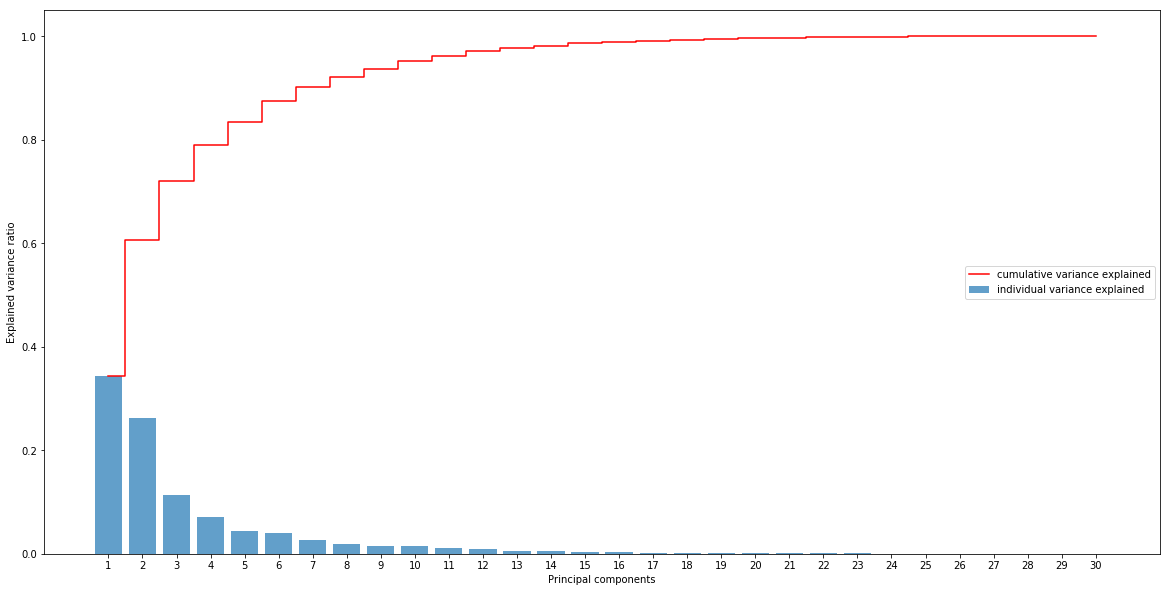

PC1 Cumulative variance: 34.436%
PC2 Cumulative variance: 60.572%
PC3 Cumulative variance: 71.942%
PC4 Cumulative variance: 78.991%
PC5 Cumulative variance: 83.460%
PC6 Cumulative variance: 87.464%
PC7 Cumulative variance: 90.208%
PC8 Cumulative variance: 92.164%
PC9 Cumulative variance: 93.729%
PC10 Cumulative variance: 95.165%
PC11 Cumulative variance: 96.224%
PC12 Cumulative variance: 97.055%
PC13 Cumulative variance: 97.668%
PC14 Cumulative variance: 98.181%
PC15 Cumulative variance: 98.593%
PC16 Cumulative variance: 98.890%
PC17 Cumulative variance: 99.131%
PC18 Cumulative variance: 99.302%
PC19 Cumulative variance: 99.461%
PC20 Cumulative variance: 99.608%
PC21 Cumulative variance: 99.694%
PC22 Cumulative variance: 99.776%
PC23 Cumulative variance: 99.846%
PC24 Cumulative variance: 99.894%
PC25 Cumulative variance: 99.937%
PC26 Cumulative variance: 99.969%
PC27 Cumulative variance: 99.986%
PC28 Cumulative variance: 99.994%
PC29 Cumulative variance: 99.999%
PC30 Cumulative varianc

In [659]:
seed = 7
test_size = 0.3
pca = PCA(random_state = seed)
pca.fit(normalize_data_2_M)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(20,10))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance explained', \
       alpha = 0.7)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance explained', \
        color= 'red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

# Cumulative variance explained
for i, sum in enumerate(cum_var_exp):
    print("PC" + str(i+1), "Cumulative variance: %.3f% %" %(cum_var_exp[i]*100))

In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # read and wrangle dataframes
import matplotlib.pyplot as plt # visualization
import seaborn as sns # statistical visualizations and aesthetics
from sklearn.base import TransformerMixin # To create new classes for transformations
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) # preprocessing 
from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox # data transform
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) # model selection modules
from sklearn.pipeline import Pipeline # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin # To create a box-cox transformation class
from collections import Counter
import warnings
# load models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import (XGBClassifier, plot_importance)
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from time import time

%matplotlib inline 
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [706]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 30)  
normalize_data_2_B1 = lda.fit_transform(normalize_data_2_B )
normalize_data_2_B1


TypeError: fit() missing 1 required positional argument: 'y'

# PCA from Scratch

In [832]:
eign_val1 , eign_vct1 = np.linalg.eig(normalize_data_2_B.cov())
# now we have to short eign_vals  with  eign_vectors
sort_index1 = eign_val1.argsort()[ : : -1 ]
print( "Look At these values :" , eign_val1.argsort()[ : : -1 ])
sorted_eign_val1 = eign_val1[sort_index1]
sorted_eign_vct1 = eign_vct1[:,sort_index1]
sorted_labels1 = np.array(columns_names)[sort_index1]

eign_val_14D_space1 = eign_val1[sort_index1[0:14]]
eign_vct_14D_space1 = eign_vct1[:,sort_index1[0:14]]
sorted_labels1 = sorted_labels1[:14]
forming_vector_14D1 = normalize_data_2_B.dot(eign_vct_14D_space1)

a1 = pd.DataFrame(forming_vector_14D1 )
a1.columns = sorted_labels1

final_benign_cov = (a1.cov())
final_benign_mean = (a1.mean(axis=0))


Look At these values : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 29 28 27 26 25
 24 23 22 21 20 19]


In [823]:
eign_val , eign_vct = np.linalg.eig(normalize_data_2_M.cov())
# now we have to short eign_vals  with  eign_vectors
sort_index = eign_val.argsort()[ : : -1 ]
sorted_eign_val = eign_val[sort_index]
sorted_eign_vct = eign_vct[:,sort_index]
sorted_labels = np.array(columns_names)[sort_index]
       
eign_val_14D_space = eign_val[sort_index[0:14]]
eign_vct_14D_space = eign_vct[:,sort_index[0:14]]
sorted_labels = sorted_labels[:14]
forming_vector_14D = normalize_data_2_B.dot(eign_vct_14D_space)
        
forming_vector_14D
a = pd.DataFrame(forming_vector_14D )
a.columns = sorted_labels

final_malignent_cov = (a.cov())
final_malignent_mean = a.mean(axis = 0)

In [828]:
final_benign_cov


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se
radius_mean,9.291167e+00,5.964619e-15,-2.396620e-15,-1.208863e-16,2.172279e-15,-3.879604e-16,6.471443e-16,2.238861e-15,-1.377686e-15,-4.073755e-16,-1.478566e-15,-3.051486e-16,1.623517e-15,2.884427e-15
texture_mean,5.964619e-15,7.858013e+00,6.895941e-16,-4.797762e-16,2.923450e-16,-2.761390e-16,3.115456e-16,-9.044103e-16,-2.154353e-16,-8.659553e-16,-8.965677e-16,-1.707217e-16,6.365065e-16,2.274630e-15
perimeter_mean,-2.396620e-15,6.895941e-16,3.515018e+00,-2.110193e-15,8.773519e-16,-6.596882e-17,5.592654e-17,-2.332958e-15,-5.706478e-16,3.062570e-16,2.004908e-16,-2.654115e-16,-8.543418e-17,-3.181860e-16
area_mean,-1.208863e-16,-4.797762e-16,-2.110193e-15,2.391809e+00,1.108525e-15,9.559212e-17,1.810655e-16,-3.313828e-16,-7.638029e-16,-4.821010e-16,-2.034703e-17,-4.841088e-16,7.287413e-16,-5.391677e-16
smoothness_mean,2.172279e-15,2.923450e-16,8.773519e-16,1.108525e-15,1.865051e+00,-2.385203e-16,5.317588e-16,6.819181e-16,3.579149e-17,2.519531e-16,1.833951e-17,-3.600524e-16,5.566850e-16,-2.149612e-17
compactness_mean,-3.879604e-16,-2.761390e-16,-6.596882e-17,9.559212e-17,-2.385203e-16,1.353606e+00,3.331721e-16,1.721843e-17,-3.844248e-16,3.533375e-16,-3.803955e-16,-1.084552e-16,4.483310e-16,3.165358e-16
concavity_mean,6.471443e-16,3.115456e-16,5.592654e-17,1.810655e-16,5.317588e-16,3.331721e-16,8.093799e-01,-1.451680e-16,-3.708156e-17,-1.825559e-16,-1.681766e-16,1.752743e-16,-1.444156e-17,-2.590613e-16
concave points_mean,2.238861e-15,-9.044103e-16,-2.332958e-15,-3.313828e-16,6.819181e-16,1.721843e-17,-1.451680e-16,5.496251e-01,-4.226728e-15,9.002588e-17,-8.243892e-16,-1.379568e-17,5.774162e-16,-2.574957e-16
symmetry_mean,-1.377686e-15,-2.154353e-16,-5.706478e-16,-7.638029e-16,3.579149e-17,-3.844248e-16,-3.708156e-17,-4.226728e-15,5.150068e-01,1.808999e-16,-6.519349e-16,-1.975610e-16,9.017255e-17,-4.487260e-17
fractal_dimension_mean,-4.073755e-16,-8.659553e-16,3.062570e-16,-4.821010e-16,2.519531e-16,3.533375e-16,-1.825559e-16,9.002588e-17,1.808999e-16,4.048937e-01,-4.894618e-16,-1.284587e-15,-1.995752e-16,7.171310e-17
